# Physical Coupled Learning Training



In [10]:
%load_ext autoreload
%autoreload 2

import sys
import matplotlib.pyplot as plt
sys.path.append('../../modules/')
import plotting_functions
import graphs
import training


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


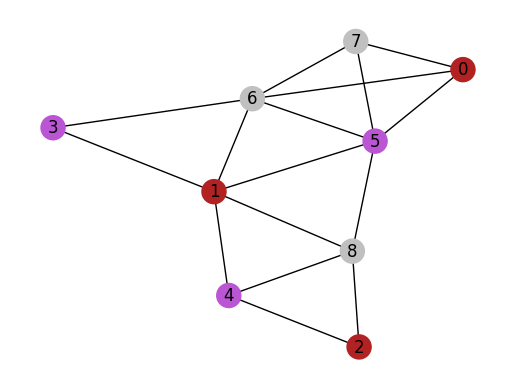

In [11]:
# Choose the graph: select desired parameters 
G = graphs.dillavou_graph(save_data=True)
fig, ax = plt.subplots()
plotting_functions.plot_graph(ax, fig, 'dillavou_graph')
# Don't change the graph G itself here below

In [12]:
# Train the graph

G1 = G.copy()
G2 = G.copy()

G1 = training.training_epoch(G1, rule = 'discrete', update = 'resistances', mse=True, 
                             resistances_change=True)

# print(G2.edges[(0,5)])
G2 = training.training_epoch(G2, rule = 'continuous', update = 'resistances', mse=True, 
                             resistances_change=True)

1e-16 0.5 500000.0 1000000.0 100


IndexError: list index out of range

## Dillavou network 

Here I compare the implementation of the discrete and continuous rule in Dullavou graph. To check the status of the training, we show here the behaviour of the **mean-squared error** (MSE) as a function of training steps. It is defined as[]

$C = \frac{1}{2} \sum_{T} \left( V_{T}^{F} - V_{T} \right)$ 

I also plot the behaviour of the resistance as the training time evolves.

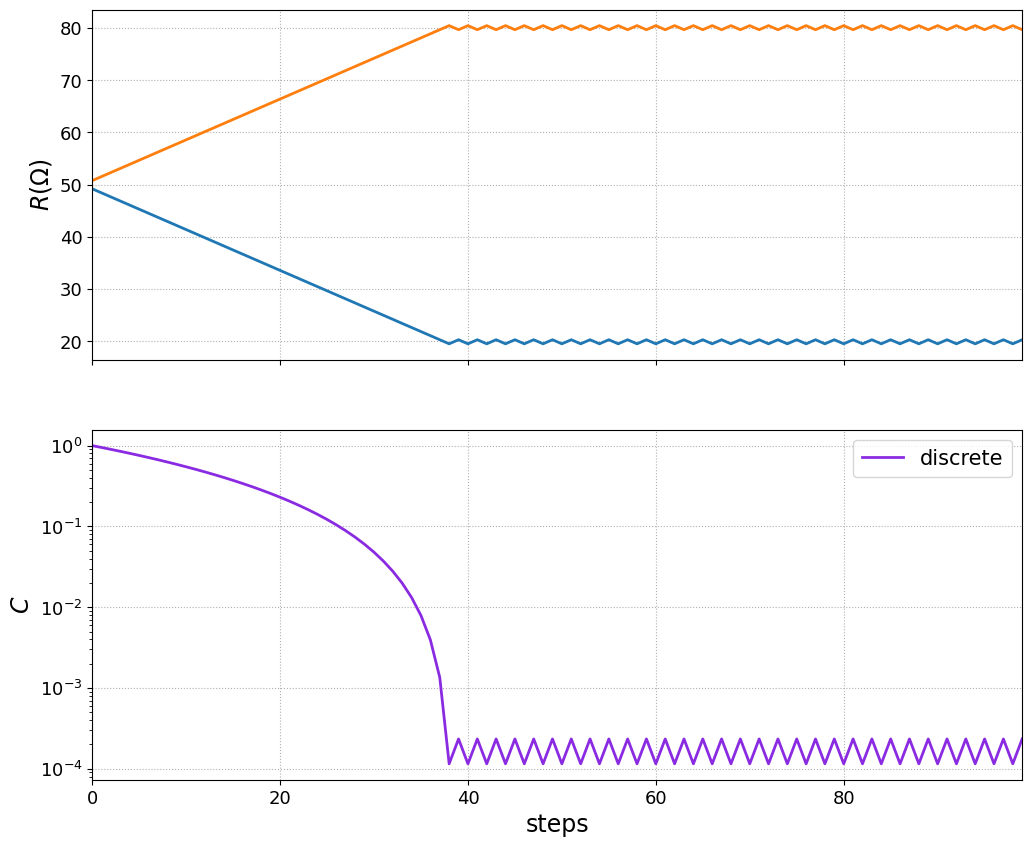

In [9]:
fig, ax = plt.subplots(2,1, figsize = (12,10))
# plotting_functions.simple_plot_resistances(ax[0], rule = 'discrete')
plotting_functions.plot_resistances(ax[0], G1, rule = 'discrete')
plotting_functions.plot_mse(ax[1], fig, rule = 'discrete', update = 'resistances')

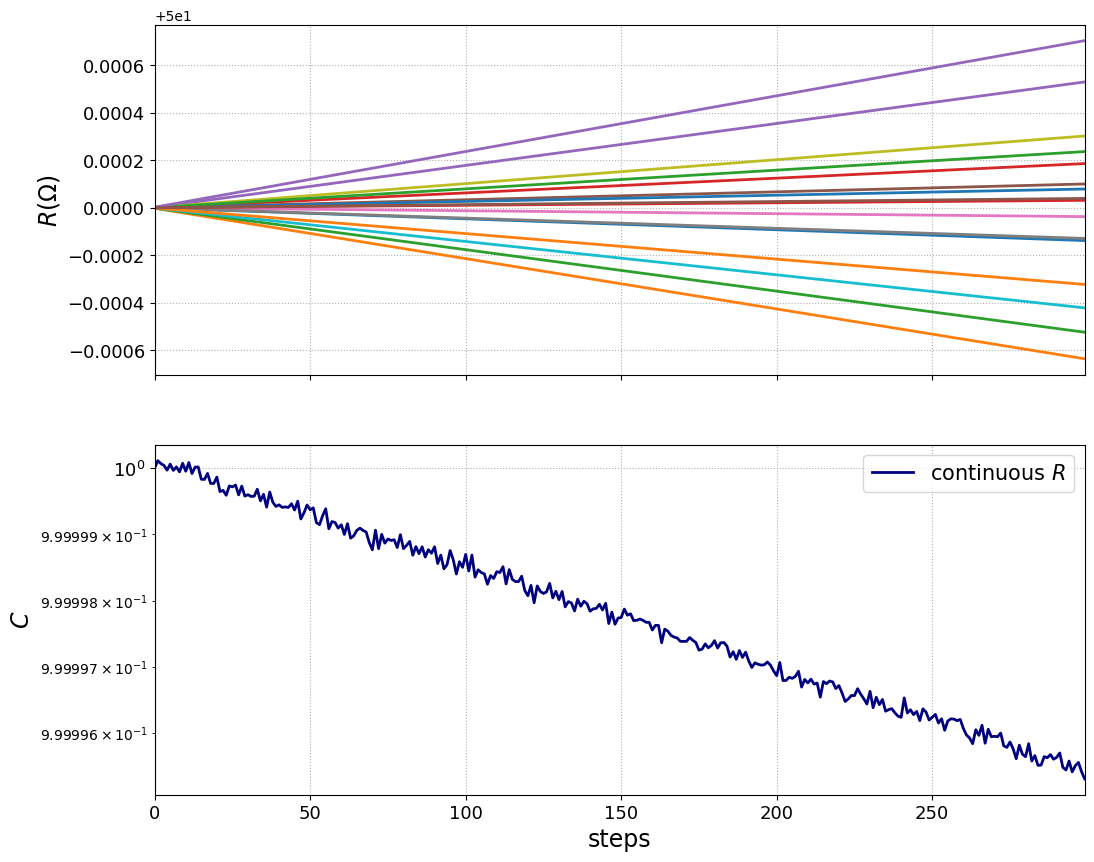

In [7]:
fig, ax = plt.subplots(2,1, figsize = (12,10))
plotting_functions.plot_resistances(ax[0], G2, rule = 'continuous')
plotting_functions.plot_mse(ax[1], fig, rule = 'continuous', update = 'resistances')

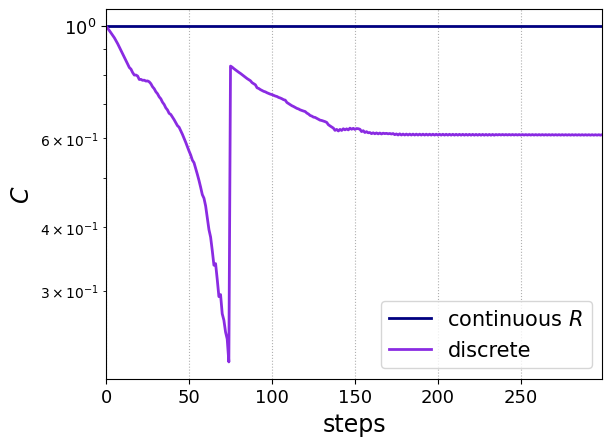

In [8]:
fig, ax = plt.subplots()
plotting_functions.plot_mse(ax, fig, rule = 'continuous', update = 'resistances')
plotting_functions.plot_mse(ax, fig, rule = 'discrete', update = 'resistances')

I see that some resistances go to zero as the training time evolves. A zero resistance would mean an infinite power. I tried to remove the correspondin edges and train the resulting network. As expeted, C peaks when a resistance is remove. However, the training of the new network without edges with zero resistance is not effective, it is very slow.

> Zero resistance means infinte power dissipated, eliminating the resistance means zero power so I think that this is not the right way of proceeding.

I want to check what happens if we train the conductance instead (1/resistance) in the continuous case. This can be compared with results in papers. I have not seen the implementation of the continuous rule in the case of resistances. They do it in the discrete case, but there they also have noise, and maybe that is what avids the resistances to go to zero (?).

In [27]:
G4 = G.copy()
G4 = training.training_epoch(G4, rule = 'continuous', update = 'resistances', mse=True, 
                             resistances_change=True, noise=False)

1e-16 100000.0 300 1 False


In [31]:
G3 = G.copy()
G3 = training.training_epoch(G3, rule = 'continuous', update = 'conductances', mse=True, 
                              conductances_change=True, noise=False)

1e-16 100000.0 2000 1 False


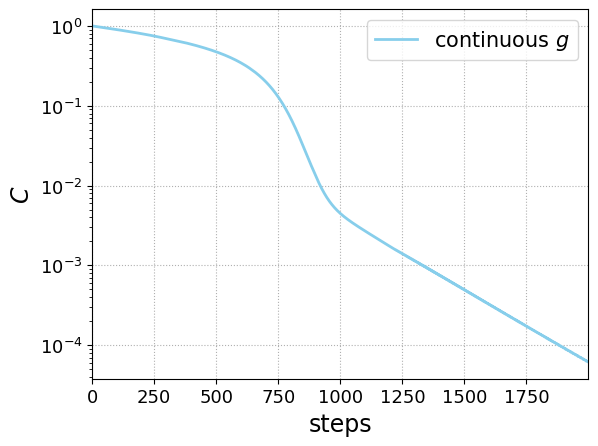

In [33]:
fig, ax = plt.subplots()
# plotting_functions.plot_mse(ax, fig, rule = 'continuous', update='resistances')
plotting_functions.plot_mse(ax, fig, rule = 'continuous', update='conductances')

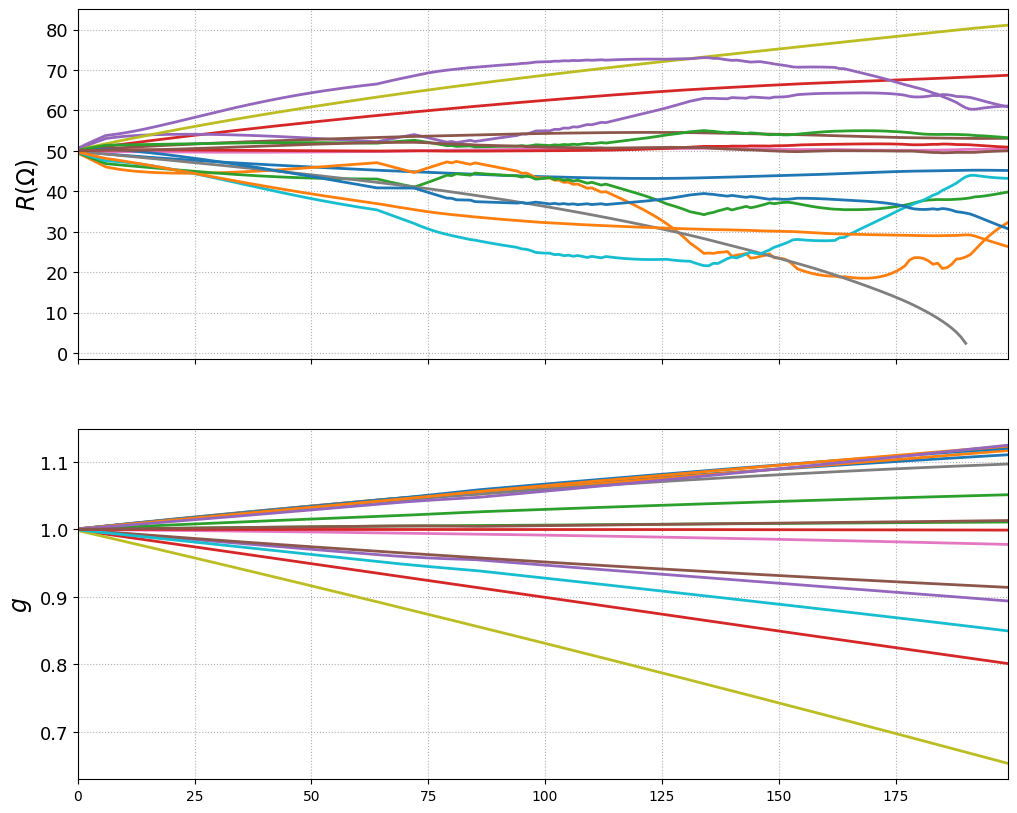

In [7]:
fig, ax = plt.subplots(2,1, figsize = (12,10))
plotting_functions.plot_resistances(ax[0], G4, rule = 'continuous')
plotting_functions.plot_conductaces(ax[1], G4)

In [6]:
print(G3.nodes[3]['voltage'])
print(G3.nodes[4]['voltage'])
print(G3.nodes[5]['voltage'])


1.5134678652660594
1.0894756350622732
2.3675714576670126
